In [1]:
%matplotlib inline

In [2]:
from bigbang.archive import Archive
import bigbang.parse as parse
import bigbang.analysis.graph as graph
import bigbang.ingress.mailman as mailman
import bigbang.analysis.process as process
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint as pp
import pytz
import numpy as np
import math
import nltk
from itertools import repeat
from nltk.stem.lancaster import LancasterStemmer

st = LancasterStemmer()
from nltk.corpus import stopwords
import re
import random

In [3]:
urls = [
    "http://mail.python.org/pipermail/ipython-dev/",
    "http://mail.python.org/pipermail/ipython-user/",
]  # ,
# "http://mail.python.org/pipermail/scipy-dev/",
# "http://mail.python.org/pipermail/scipy-user/",
# "http://mail.python.org/pipermail/numpy-discussion/"]


archives = [Archive(url, archive_dir="../archives") for url in urls]

Opening 138 archive files
Opening 139 archive files


In [4]:
text = list(
    open("test123.csv")
)  # This file is the target words got from other notebook (Special words analysis).
# Example one is the 224 words shared by "http://mail.scipy.org/pipermail/ipython-dev/" and
# "http://mail.scipy.org/pipermail/ipython-user/" which have potential of idea transferring between the two lists.

In [5]:
new_text = []
for line in text:
    line = line.strip()
    contents = line.split(",")
    new_text.append(contents)

In [6]:
new_text1 = new_text[0]

In [14]:
random_label = random.sample(
    list(range(len(new_text1))), 10
)  # generate 5 random sample words

In [15]:
new_text2 = []
for i in range(len(new_text1)):
    if i in random_label:
        new_text2.append(new_text1[i])

In [16]:
new_text2

['desktop',
 'alex',
 'drop',
 'wxpython',
 'zero',
 'yup',
 'ps',
 'keyword',
 'pol',
 'runtim']

In [10]:
"""df = [0] * len(new_text2)

for a in range(len(new_text2)):
    df[a] = pd.DataFrame(columns=["MessageId","Date","From","In-Reply-To","Count"])
    for row in archives[0].data.iterrows():
        w = row[1]["Body"].replace("'", "")
        k = re.sub(r'[^\w]', ' ', w)
        k = k.lower()
        t = nltk.tokenize.word_tokenize(k)
        subdict = {}
        count = 0
        for g in t:
            try:
                word = st.stem(g)
            except:
                print g
                pass
            if word == new_text2[a]:
                count += 1
        if count == 0:
            continue
        else:
            subdict["MessageId"] = row[0]
            subdict["Date"] = row[1]["Date"]
            subdict["From"] = row[1]["From"]
            subdict["In-Reply-To"] = row[1]["In-Reply-To"]
            subdict["Count"] = count
            df[a] = df[a].append(subdict,ignore_index=True)"""

In [17]:
df = [0] * len(new_text2)
for a in range(len(new_text2)):
    df[a] = pd.DataFrame(columns=["MessageId", "Date", "From", "In-Reply-To", "Count"])
for row in archives[0].data.iterrows():
    w = row[1]["Body"].replace("'", "")
    k = re.sub(r"[^\w]", " ", w)
    k = k.lower()
    t = nltk.tokenize.word_tokenize(k)
    count = [0] * len(new_text2)
    for g in t:
        try:
            word = st.stem(g)
        except:
            print(g)
            pass
        for p in range(len(new_text2)):
            if word == new_text2[p]:
                count[p] += 1
    for m in range(len(new_text2)):
        subdict = {}
        if count[m] == 0:
            continue
        else:
            subdict["MessageId"] = row[0]
            subdict["Date"] = row[1]["Date"]
            subdict["From"] = row[1]["From"]
            subdict["In-Reply-To"] = row[1]["In-Reply-To"]
            subdict["Count"] = count[m]
            df[m] = df[m].append(subdict, ignore_index=True)
"""    if count == 0:
        continue
    else:
        subdict["MessageId"] = row[0]
        subdict["Date"] = row[1]["Date"]
        subdict["From"] = row[1]["From"]
        subdict["In-Reply-To"] = row[1]["In-Reply-To"]
        subdict["Count"] = count
        df[a] = df[a].append(subdict,ignore_index=True)"""

'    if count == 0:\n        continue\n    else:\n        subdict["MessageId"] = row[0]\n        subdict["Date"] = row[1]["Date"]\n        subdict["From"] = row[1]["From"]\n        subdict["In-Reply-To"] = row[1]["In-Reply-To"]\n        subdict["Count"] = count\n        df[a] = df[a].append(subdict,ignore_index=True)'

In [18]:
df1 = [0] * len(new_text2)
for a in range(len(new_text2)):
    df1[a] = pd.DataFrame(columns=["MessageId", "Date", "From", "In-Reply-To", "Count"])
for row in archives[1].data.iterrows():
    w = row[1]["Body"].replace("'", "")
    k = re.sub(r"[^\w]", " ", w)
    k = k.lower()
    t = nltk.tokenize.word_tokenize(k)
    count = [0] * len(new_text2)
    for g in t:
        try:
            word = st.stem(g)
        except:
            print(g)
            pass
        for p in range(len(new_text2)):
            if word == new_text2[p]:
                count[p] += 1
    for m in range(len(new_text2)):
        subdict = {}
        if count[m] == 0:
            continue
        else:
            subdict["MessageId"] = row[0]
            subdict["Date"] = row[1]["Date"]
            subdict["From"] = row[1]["From"]
            subdict["In-Reply-To"] = row[1]["In-Reply-To"]
            subdict["Count"] = count[m]
            df1[m] = df1[m].append(subdict, ignore_index=True)

In [11]:
"""df1 = [0] * len(new_text2)

for a in range(len(new_text2)):
    df1[a] = pd.DataFrame(columns=["MessageId","Date","From","In-Reply-To","Count"])
    for row in archives[1].data.iterrows():
        w = row[1]["Body"].replace("'", "")
        k = re.sub(r'[^\w]', ' ', w)
        k = k.lower()
        t = nltk.tokenize.word_tokenize(k)
        subdict = {}
        count = 0
        for g in t:
            try:
                word = st.stem(g)
            except:
                print g
                pass
            if word == new_text2[a]:
                count += 1
        if count == 0:
            continue
        else:
            subdict["MessageId"] = row[0]
            subdict["Date"] = row[1]["Date"]
            subdict["From"] = row[1]["From"]
            subdict["In-Reply-To"] = row[1]["In-Reply-To"]
            subdict["Count"] = count
            df1[a] = df1[a].append(subdict,ignore_index=True)"""

In [63]:
# First mailing list
start_date = []
end_date = []
for k in range(len(new_text2)):
    start_date.append(df[k].iloc[0]["Date"])
    end_date.append(df[k].iloc[len(df[k].index) - 1]["Date"])

In [65]:
start_date1 = min(start_date)
end_date1 = max(end_date)
total_month = (end_date1.year - start_date1.year) * 12 + (
    end_date1.month - start_date1.month + 1
)

In [22]:
total_month

138

In [23]:
k_time_dict = []
for k in range(len(new_text2)):
    time_dict = {}
    for row in df[k].iterrows():
        if (row[1]["Date"].year, row[1]["Date"].month) not in time_dict:
            time_dict[(row[1]["Date"].year, row[1]["Date"].month)] = row[1]["Count"]
        else:
            time_dict[(row[1]["Date"].year, row[1]["Date"].month)] += row[1]["Count"]
    k_time_dict.append(time_dict)

In [102]:
k_month = []
temp_year = start_date1.year
temp_month = start_date1.month
for i in range(total_month):
    k_month.append((temp_year, temp_month))
    if temp_month == 12:
        temp_year += 1
        temp_month = 0
    temp_month += 1

In [103]:
k_by_month = []
for k in range(len(new_text2)):
    by_month = []
    for item in k_month:
        if item in k_time_dict[k]:
            by_month.append(k_time_dict[k][item])
        else:
            by_month.append(0)
    k_by_month.append(by_month)

['desktop', 'alex', 'drop', 'wxpython', 'zero']

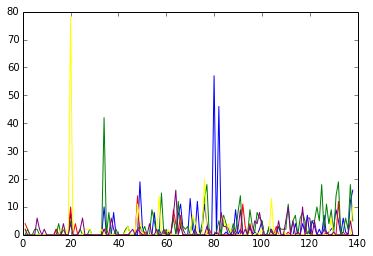

In [104]:
x = list(range(1, total_month + 1))
y0 = k_by_month[0]
plt.plot(x, y0, color="blue")
y1 = k_by_month[1]
plt.plot(x, y1, color="red")
y2 = k_by_month[2]
plt.plot(x, y2, color="green")
y3 = k_by_month[3]
plt.plot(x, y3, color="yellow")
y4 = k_by_month[4]
plt.plot(x, y4, color="purple")
new_text2[:5]

['yup', 'ps', 'keyword', 'pol', 'runtim']

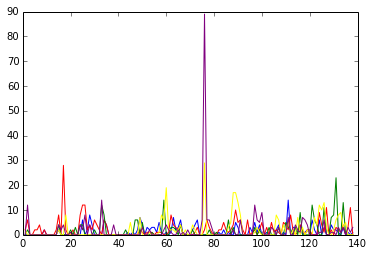

In [105]:
x = list(range(1, total_month + 1))
y0 = k_by_month[5]
plt.plot(x, y0, color="blue")
y1 = k_by_month[6]
plt.plot(x, y1, color="red")
y2 = k_by_month[7]
plt.plot(x, y2, color="green")
y3 = k_by_month[8]
plt.plot(x, y3, color="yellow")
y4 = k_by_month[9]
plt.plot(x, y4, color="purple")
new_text2[5:]

### Below part considers classification

In [ ]:
# Example as word "desktop"


In [106]:
normalized = [0] * len(new_text2)
for i in range(len(new_text2)):
    normalized[i] = np.asarray((k_by_month[i])) / float(sum(k_by_month[i]))

In [107]:
# define any month consists of over 25% of frequencies as spike.
for a in range(len(new_text2)):
    count = 0  # number of spikes
    inf = []
    for i in range(total_month):
        if normalized[a][i] >= 0.25:
            count += 1
            inf.append(k_month[i])
    if count > 0:
        print([new_text2[a], "Spike", count, inf])

['wxpython', 'Spike', 1, [(2004, 11)]]
['runtim', 'Spike', 1, [(2009, 7)]]


In [112]:
# Appear after 1/3 time span
# Die out before last 1/3 time span
timespan = k_month[int(total_month / 3)]
timespan1 = k_month[int(total_month * 2 / 3)]

In [116]:
type(timespan)

tuple

In [121]:
for a in range(len(new_text2)):
    if start_date[a].year > timespan[0]:
        print([new_text2[a], "LateFirstAppear"])
    elif start_date[a].year == timespan[0] and start_date[a].month >= timespan[1]:
        print([new_text2[a], "LateFirstAppear"])
    if end_date[a].year < timespan1[0]:
        print([new_text2[a], "EarlyLastAppear"])
    elif end_date[a].year == timespan1[0] and end_date[a].month <= timespan1[1]:
        print([new_text2[a], "EarlyLastAppear"])

## Work done up to now.

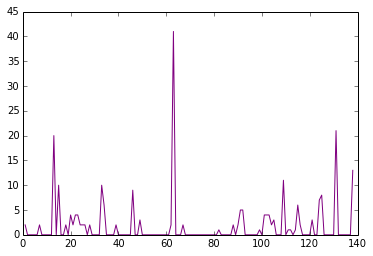

In [61]:
x = list(range(1, total_month + 1))
y4 = k_by_month[4]
plt.plot(x, y4, color="purple")

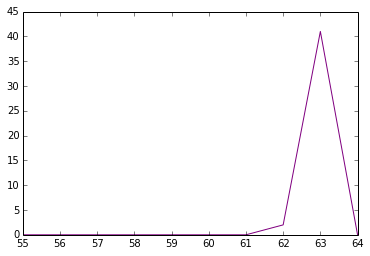

In [65]:
x = list(range(55, 65))
y4 = k_by_month[4]
plt.plot(x, y4[54:64], color="purple")

In [96]:
k_time_dict

[{(2004, 5): 2,
  (2004, 11): 8,
  (2006, 1): 10,
  (2006, 5): 8,
  (2007, 4): 19,
  (2007, 5): 3,
  (2007, 10): 8,
  (2007, 12): 2,
  (2008, 4): 1,
  (2008, 8): 7,
  (2008, 9): 11,
  (2008, 10): 2,
  (2009, 1): 13,
  (2009, 2): 2,
  (2009, 4): 12,
  (2009, 6): 2,
  (2009, 7): 11,
  (2009, 8): 4,
  (2009, 11): 57,
  (2010, 1): 46,
  (2010, 4): 1,
  (2010, 8): 9,
  (2010, 10): 2,
  (2011, 2): 3,
  (2011, 4): 1,
  (2011, 6): 2,
  (2011, 7): 5,
  (2011, 10): 2,
  (2011, 11): 1,
  (2012, 1): 1,
  (2012, 2): 3,
  (2012, 9): 4,
  (2012, 12): 4,
  (2013, 1): 1,
  (2013, 2): 7,
  (2013, 4): 5,
  (2013, 5): 3,
  (2013, 7): 2,
  (2013, 9): 7,
  (2013, 11): 1,
  (2013, 12): 2,
  (2014, 1): 3,
  (2014, 2): 9,
  (2014, 3): 5,
  (2014, 5): 6,
  (2014, 6): 1,
  (2014, 8): 12,
  (2014, 9): 16},
 {(2003, 4): 4,
  (2003, 5): 2,
  (2004, 5): 2,
  (2004, 11): 10,
  (2005, 1): 4,
  (2006, 1): 2,
  (2006, 2): 2,
  (2007, 3): 14,
  (2007, 6): 1,
  (2008, 3): 1,
  (2008, 6): 9,
  (2008, 7): 4,
  (2008, 8): 1,